In [1]:
# sklearn dataset : https://scikit-learn.org/stable/datasets/index.html

from sklearn.datasets import load_boston

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, fbeta_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold



In [2]:
# X, y = load_boston(return_X_y=True)
# print(X, y)

dataset = load_boston()
print(dataset.keys())
df = pd.DataFrame(data=dataset.data,
    columns=dataset.feature_names
)
df["MEDV"] = dataset.target #kaggle target MEDV
X_df = df.iloc[: , :-1]
y_df = df.iloc[: , -1]

X_train , X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, shuffle=True, random_state=121)
print(X_train.shape , y_train.shape,X_val.shape,  y_val.shape )


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(404, 13) (404,) (102, 13) (102,)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<pre>
[01]  CRIM 자치시(town) 별 1인당 범죄율  
[02]  ZN 25,000 평방피트를 초과하는 거주지역의 비율  
[03]  INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
[04]  CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
[05]  NOX 10ppm 당 농축 일산화질소  
[06]  RM 주택 1가구당 평균 방의 개수  
[07]  AGE 1940년 이전에 건축된 소유주택의 비율  
[08]  DIS 5개의 보스턴 직업센터까지의 접근성 지수  
[09]  RAD 방사형 도로까지의 접근성 지수  
[10]  TAX 10,000 달러 당 재산세율  
[11]  PTRATIO 자치시(town)별 학생/교사 비율  
[12]  B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
[13]  LSTAT 모집단의 하위계층의 비율(%)  
[14]  MEDV-->target 본인 소유의 주택가격(중앙값) (단위: $1,000)
</pre>

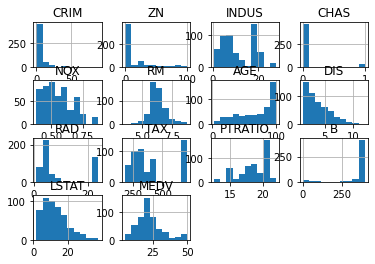

In [6]:
df.hist()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 우선 점수부터 보자

In [8]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
pred = model1.predict(X_val)
mse = mean_squared_error(y_val, pred, squared=True)
rmse = mean_squared_error(y_val, pred, squared=False)
print(f'MSE:{mse:.5f}  RMSE:{rmse:.5f}')

MSE:26.27265  RMSE:5.12569


* sklearn.metrics.mean_squared_error (squared=True)    MSE 
* sklearn.metrics.mean_squared_error (squared=False)   RMSE    
* ref : https://scikit-learn.org/stable/modules/model_evaluation.html

<table class="docutils align-default">
<colgroup>
<col style="width: 31%">
<col style="width: 40%">
<col style="width: 29%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Scoring</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Regression</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘explained_variance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score" title="sklearn.metrics.explained_variance_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.explained_variance_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘max_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.max_error.html#sklearn.metrics.max_error" title="sklearn.metrics.max_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.max_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_absolute_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error" title="sklearn.metrics.mean_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_squared_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_root_mean_squared_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_squared_log_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error" title="sklearn.metrics.mean_squared_log_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_log_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_median_absolute_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error" title="sklearn.metrics.median_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.median_absolute_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘r2’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score" title="sklearn.metrics.r2_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.r2_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_poisson_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_poisson_deviance.html#sklearn.metrics.mean_poisson_deviance" title="sklearn.metrics.mean_poisson_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_poisson_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_gamma_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_gamma_deviance.html#sklearn.metrics.mean_gamma_deviance" title="sklearn.metrics.mean_gamma_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_gamma_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_absolute_percentage_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error" title="sklearn.metrics.mean_absolute_percentage_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_percentage_error</span></code></a></p></td>
<td></td>
</tr>
</tbody>
</table>

## preprocessing (전처리)

<AxesSubplot:>

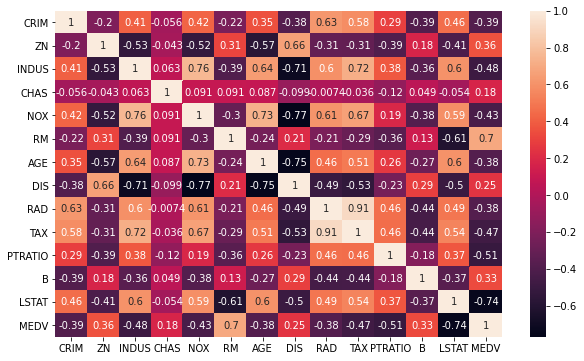

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2g")

In [10]:
# corr_df = pd.DataFrame(df.corr(), index=df.columns).sort_values(ascending=False)
df.corrwith(df["MEDV"]).sort_values(ascending=False)

# RM         0.695360
# ZN         0.360445
# B          0.333461

# NOX       -0.427321
# TAX       -0.468536
# INDUS     -0.483725
# PTRATIO   -0.507787
# LSTAT     -0.737663


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
dtype: float64

In [11]:
nfeature = ['RM','ZN','B','NOX','TAX','INDUS','PTRATIO','LSTAT']  

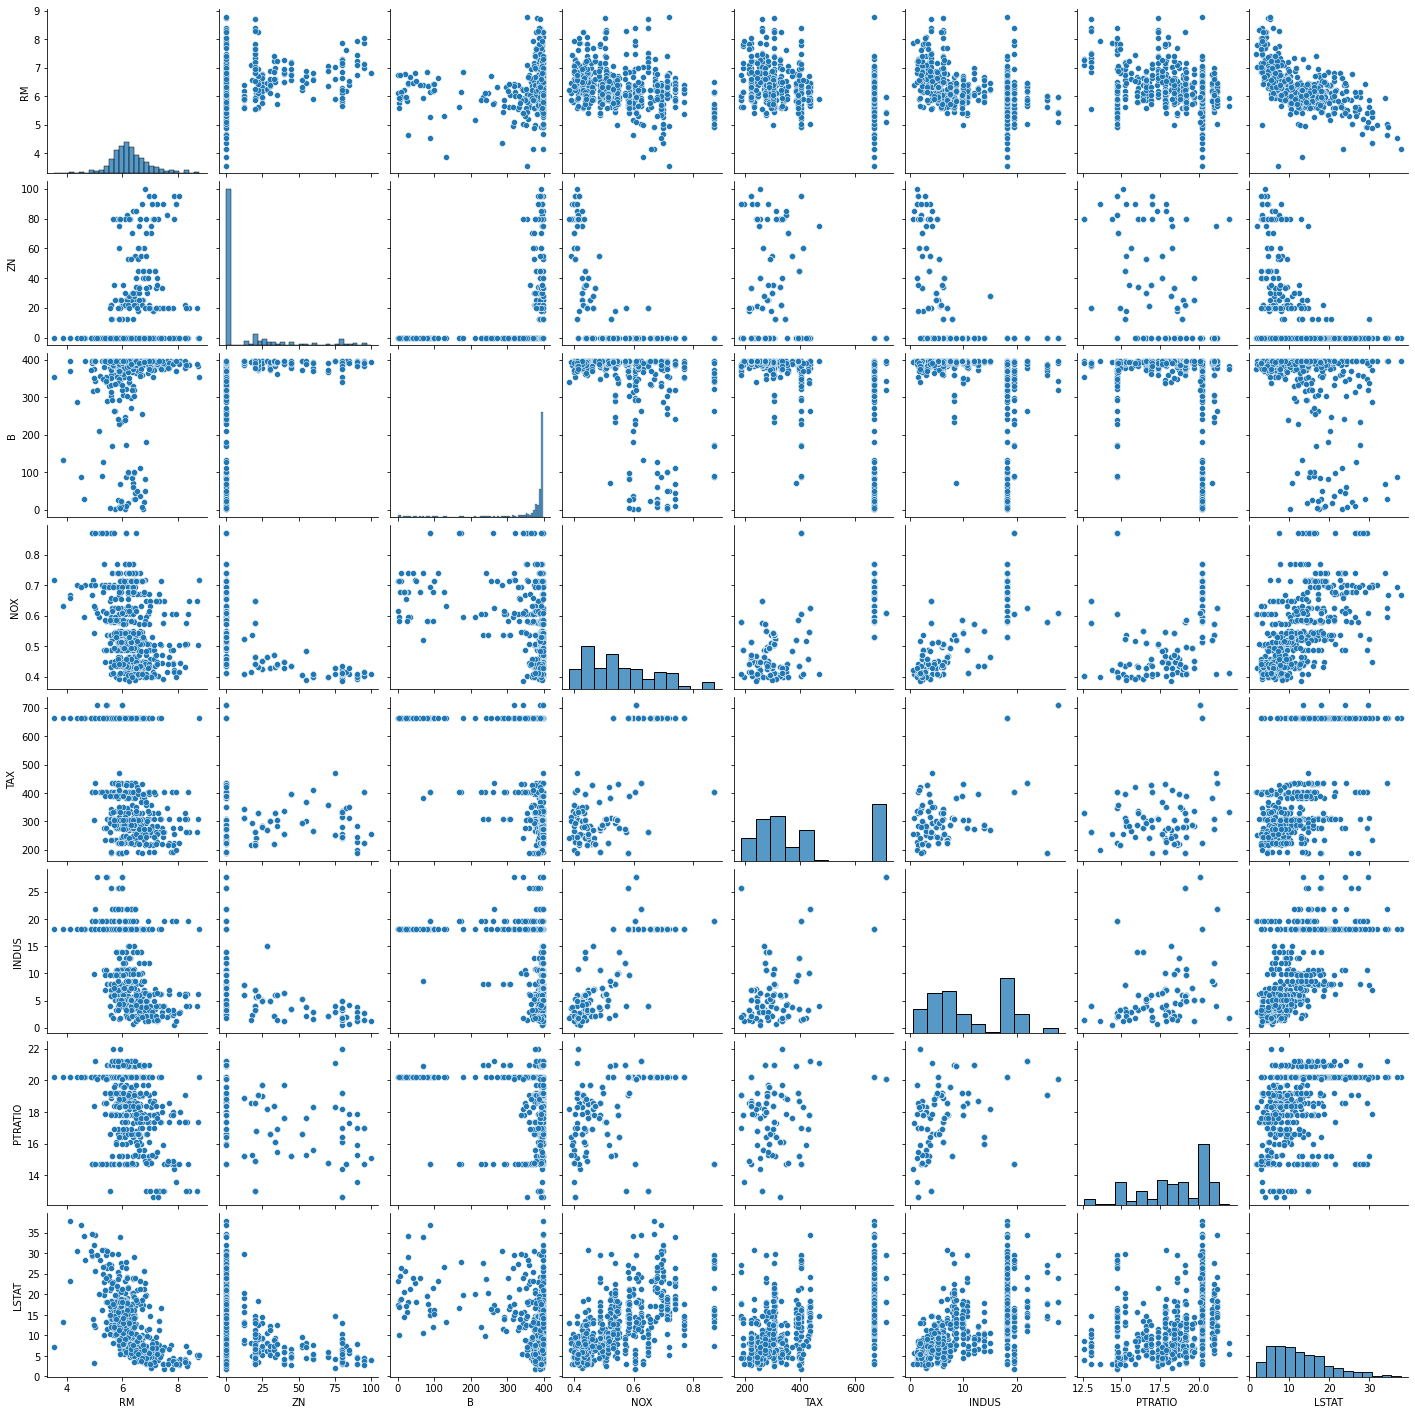

In [12]:
# nfeature = ['RM','ZN','B','NOX','TAX','INDUS','PTRATIO','LSTAT']  
sns.pairplot(df[nfeature])

In [13]:
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

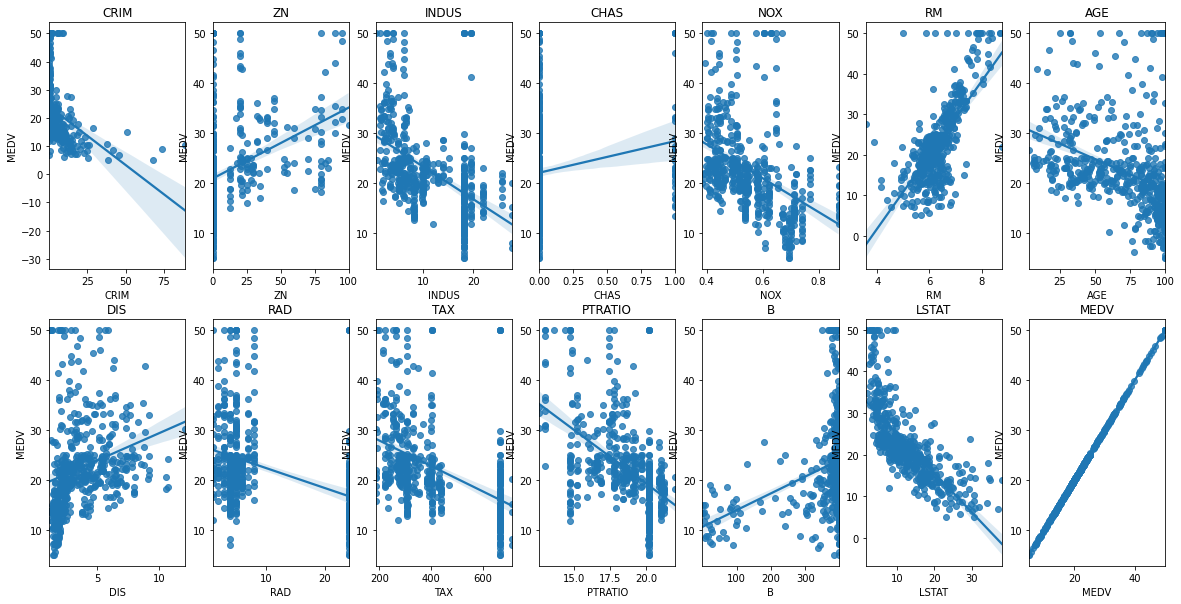

In [14]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
for i, feature in enumerate(df.columns):
    cols = i%7
    rows = i//7     
    sns.regplot(y=df['MEDV'], x=df[feature], ax=axes[rows][cols])
    axes[rows][cols].set_title(feature)

# for i, nf in enumerate(nfeature) :
#     row = i//7
#     col = i%7
#     sns.boxplot(y=nf, data=df, ax=[row][col])

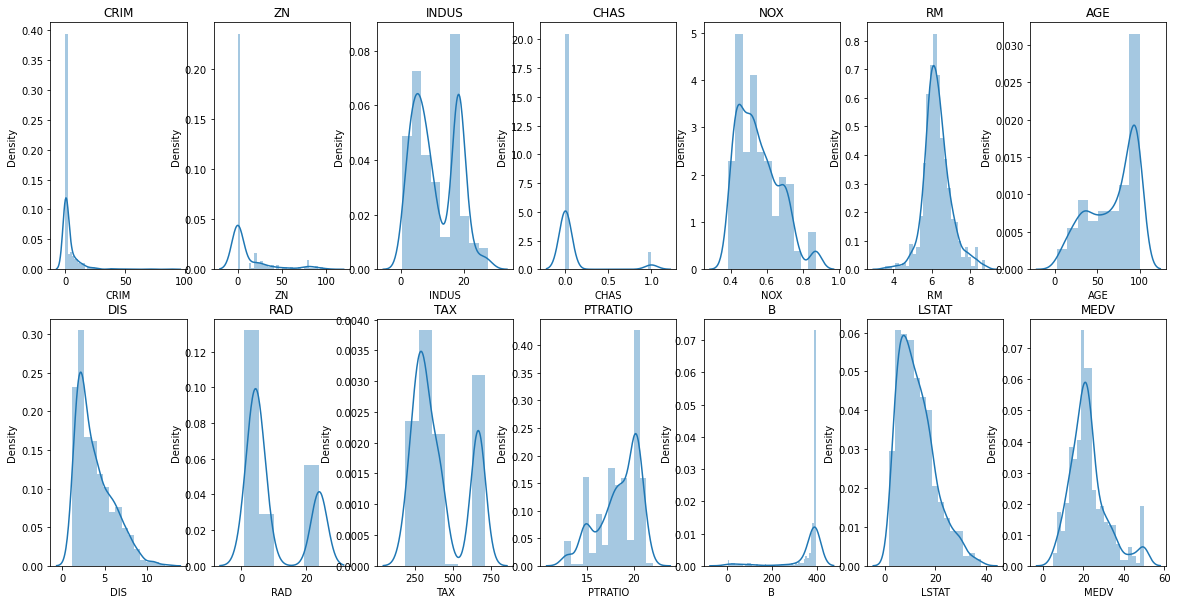

In [15]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
for i, feature in enumerate(df.columns):
    cols = i%7
    rows = i//7     
    sns.distplot(df[feature], kde=True, ax=axes[rows][cols])
    axes[rows][cols].set_title(feature)


In [16]:
# df.columns
# 'CHAS'
scale_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']
for sf in scale_features:
    df[sf] = np.log1p(df[sf])
    

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,2.944439,1.196948,0.0,0.430483,2.024853,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421,3.218876
1,0.026944,0.000000,2.088153,0.0,0.384582,2.004314,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488,3.117950
2,0.026924,0.000000,2.088153,0.0,0.384582,2.102303,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420,3.575151
3,0.031857,0.000000,1.156881,0.0,0.377066,2.079192,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181,3.538057
4,0.066770,0.000000,1.156881,0.0,0.377066,2.097650,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300,3.616309


In [18]:

X_df = df.iloc[: , :-1]
y_df = df.iloc[: , -1]
X_train , X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, shuffle=True, random_state=121)
print(X_train.shape , y_train.shape,X_val.shape,  y_val.shape )

model1 = LinearRegression()
model1.fit(X_train, y_train)
pred = model1.predict(X_val)
mse = mean_squared_error(y_val, pred, squared=True)
rmse = mean_squared_error(y_val, pred, squared=False)
print(f'MSE:{mse:.5f}  RMSE:{rmse:.5f}')
# MSE:26.27265  RMSE:5.12569

(404, 13) (404,) (102, 13) (102,)
MSE:0.03310  RMSE:0.18193


In [19]:
model1.coef_

array([-0.1202732 , -0.00613582, -0.01015895,  0.11219354, -0.90661023,
        0.50417989,  0.02172324, -0.2283322 ,  0.15229626, -0.15110898,
       -0.5518753 ,  0.05109765, -0.41310506])

In [20]:
MEDV_corr= df.corrwith(df["MEDV"])
coef_df = pd.DataFrame(model1.coef_, 
                       index= X_df.columns, columns = ["coef"])#.sort_values(by="coef", ascending= False)
coef_df["corr"] = df.corrwith(df["MEDV"])
coef_df.sort_values(by="coef", ascending=False)



,coef,corr
RM,0.504180,0.619280
RAD,0.152296,-0.444867
CHAS,0.112194,0.159435
B,0.051098,0.351096
AGE,0.021723,-0.391441
ZN,-0.006136,0.400188
INDUS,-0.010159,-0.558975
CRIM,-0.120273,-0.594500
TAX,-0.151109,-0.555187
DIS,-0.228332,0.390719


<pre>
Lasso : L1규제 a|W|  , 피쳐수 줄이기
    target에 중요도가 덜한 피쳐들은 규제 적용하면 w=0, 
    규제를 안해도 된다 --> 예측에서 안정적으로 사용되어질 피쳐
    
Ridge : L2규제 aW^2 , 피쳐수 그데로, 덜중요한 피쳐의 w가 작아진다
    target에 중요도가 덜한 피쳐들은 규제 적용하면 w들은 0에 근사,
    
</pre>

In [21]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
# LinearRegression()
lasso = Lasso(alpha=1.0)                    # a*|W|
ridge = Ridge(alpha=1.0)                    # a*W^2
elsnet = ElasticNet(alpha=1.0,l1_ratio=0.2)  # 0.2(a*|W|) +  0.8(a*W^2)

In [22]:
models = [lasso, ridge, elsnet]
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mse = mean_squared_error(y_val, pred, squared=True)
    rmse = mean_squared_error(y_val, pred, squared=False)
    print(f'{model.__class__.__name__}  MSE:{mse:.5f}  RMSE:{rmse:.5f}')


Lasso  MSE:0.13108  RMSE:0.36205
Ridge  MSE:0.03366  RMSE:0.18348
ElasticNet  MSE:0.11899  RMSE:0.34495


In [23]:
score_list = cross_val_score(model, X_df, y=y_df,
                    scoring='neg_mean_squared_error',
                    cv=5)
score_list = -1*score_list
print(score_list,  score_list.mean())

[0.05450471 0.11716732 0.20333358 0.21135399 0.23766554] 0.16480502873757988


In [24]:
from sklearn.model_selection import cross_validate
#models = [LinearRegression()]
for model in models:
    score_list = cross_validate(model, X_df, y=y_df,
                   scoring={'mse':'neg_mean_squared_error',
                            'rmse':'neg_root_mean_squared_error'},
                   cv=5, return_train_score=False)
#     print(score_list)
    mse_score = score_list['test_mse']*-1
    rmse_score = score_list['test_rmse']*-1
    print(f'{model.__class__.__name__}  MSE:{mse_score.mean():.5f}  ,  RMSE:{rmse_score.mean():.5f}')

# Linear MSE:0.04172  ,  RMSE:0.19428
# Ridge  MSE:0.03366  ,  RMSE:0.18348
# Ridge  MSE:0.03931  ,  RMSE:0.18956

Lasso  MSE:0.17264  ,  RMSE:0.40510
Ridge  MSE:0.03931  ,  RMSE:0.18956
ElasticNet  MSE:0.16481  ,  RMSE:0.39479


In [25]:
# Ridge  MSE:0.03366  ,  RMSE:0.18348
#  score_list = cross_validate(model, X_df, y=y_df,
#                    scoring={'mse':'neg_mean_squared_error',
#                             'rmse':'neg_root_mean_squared_error'},
#                    cv=5, return_train_score=False)
# #     print(score_list)
#     mse_score = score_list['test_mse']*-1
#     rmse_score = score_list['test_rmse']*-1
#     print(f'{model.__class__.__name__}  MSE:{mse_score.mean():.5f}  ,  RMSE:{rmse_score.mean():.5f}')


In [26]:
cv_model = GridSearchCV(ridge, 
                        param_grid={'alpha':[0.01, 1.0, 5.0, 10]},
                        scoring='neg_root_mean_squared_error', cv=10, refit=True)
cv_model.fit(X_train, y_train)
print(f'RMSE: {cv_model.best_score_*-1:.5f}')
print(cv_model.best_params_)

RMSE: 0.17720
{'alpha': 0.01}


In [41]:
pred = cv_model.predict(X_val)
print(pred[:5])
predo = np.round(np.expm1(pred),1)
print(predo)

[3.54098252 3.63115473 3.78747357 3.27430558 3.49859579]
[33.5 36.8 43.1 25.4 32.1 29.7 18.3 17.5 24.7 40.9 19.8 15.1 44.8 22.8
 13.  15.4 13.3 15.  21.3 39.1 22.6 10.9 30.1 23.6 15.6 15.9 11.4 24.2
 26.2 16.9 11.8 15.1 11.5 32.1 14.5 34.1 19.1 20.  29.1 20.4 19.1 38.9
 22.9 29.  15.7 14.7 24.6 31.9 23.6 24.6 23.7 14.9 21.6 17.1 23.4 23.9
 11.  26.3 24.1 21.2 25.4 22.5 20.3 20.2 20.7 26.  37.7 23.9 26.4 39.9
 23.4 23.1 17.3 30.7 18.9 28.1 35.1 15.8 19.8 28.  16.5 34.9 18.  14.7
 22.2 11.8 33.4 19.9 13.7 26.6 20.1 17.1 14.7 30.3 10.6 28.1 15.5 18.5
 25.1 19.6 26.1 14.7]


In [27]:
from sklearn.metrics import mean_squared_error
alpha = [0.01, 0.5, 1, 10, 100]
coef_df = pd.DataFrame()
for a in alpha:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_val)
    score = mean_squared_error(y_val, pred, squared=False)
    coef_df["alpha"+str(a)] = ridge.coef_    
    print(f'alpha:{a} \t RMSE: {score:.5f}')
coef_df.index= X_train.columns

alpha:0.01 	 RMSE: 0.18193
alpha:0.5 	 RMSE: 0.18261
alpha:1 	 RMSE: 0.18348
alpha:10 	 RMSE: 0.19368
alpha:100 	 RMSE: 0.23931


In [28]:
coef_df.sort_values(by='alpha1',ascending=False)

,alpha0.01,alpha0.5,alpha1,alpha10,alpha100
RM,0.501450,0.399168,0.335452,0.128925,0.040929
RAD,0.152156,0.147111,0.142963,0.097152,0.007397
CHAS,0.112074,0.110226,0.110445,0.107753,0.049626
B,0.051060,0.049834,0.049209,0.049421,0.048797
AGE,0.021536,0.018831,0.019170,0.019733,-0.012602
ZN,-0.006031,-0.002899,-0.001200,0.004608,0.015814
INDUS,-0.010732,-0.025138,-0.030979,-0.048885,-0.052904
CRIM,-0.120477,-0.124745,-0.125558,-0.116081,-0.087219
TAX,-0.151577,-0.159563,-0.158701,-0.108080,-0.041993
DIS,-0.226995,-0.198049,-0.189417,-0.140815,-0.028098


In [29]:
alpha = [0.01, 0.5, 1.0, 10, 100]
coef_df = pd.DataFrame()
for a in alpha:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_val)
    score = mean_squared_error(y_val, pred, squared=False)
    coef_df["alpha"+str(a)] = lasso.coef_    
    print(f'alpha:{a} \t RMSE: {score:.5f}')
coef_df.index= X_train.columns

alpha:0.01 	 RMSE: 0.21644
alpha:0.5 	 RMSE: 0.36205
alpha:1.0 	 RMSE: 0.36205
alpha:10 	 RMSE: 0.36205
alpha:100 	 RMSE: 0.36205


In [30]:
coef_df.sort_values(by='alpha0.01',ascending=False)

,alpha0.01,alpha0.5,alpha1.0,alpha10,alpha100
B,0.037242,0.0,0.0,0.0,0.0
CHAS,0.029835,0.0,0.0,0.0,0.0
AGE,0.015090,-0.0,-0.0,-0.0,-0.0
ZN,0.000000,0.0,0.0,0.0,0.0
INDUS,-0.000000,-0.0,-0.0,-0.0,-0.0
NOX,0.000000,-0.0,-0.0,-0.0,-0.0
RM,0.000000,0.0,0.0,0.0,0.0
RAD,0.000000,-0.0,-0.0,-0.0,-0.0
TAX,-0.000000,-0.0,-0.0,-0.0,-0.0
PTRATIO,-0.000000,-0.0,-0.0,-0.0,-0.0
